In [ ]:
import networkx as nx
import polars as pl
Edges = pl.read_csv("/home/alberto/LPSim/traffic_phase_transition/data/carto/BOS/edges.csv")
Dt = 15
MinutesInDay = 24*60
IntDtMinutesArray = [i for i in range(0, MinutesInDay, Dt)] 
for t in IntDtMinutesArray:
    Edges[f"trafficked_{t}"] = pl.Series("", [False for _ in range(Edges.shape[0])])

In [ ]:
p = 0.5
import numpy as np
# Function to update trafficked_{t} column
Edges.group_by("u").agg([pl.col("v") ])
def update_trafficked(df, p):
    # Iterate over each index
    
    for idx in df['index']:
        # Select rows where pl.col('u') of such index is pl.col('v') of those rows
        condition = df['v'] == df['u'][idx]
        selected_rows = df.filter(condition)
        # Generate random numbers
        random_numbers = np.random.uniform(0, 1, len(selected_rows))
        
        # Update trafficked_{t} column
        for i, row in selected_rows.iterrows():
            if random_numbers[i] > p:
                df = df.with_columns(
                    pl.when(pl.col('index') == row['index'])
                    .then(pl.col('trafficked_{t}') | True)
                    .otherwise(pl.col('trafficked_{t}'))
                    .alias('trafficked_{t}')
                )
    return df


osmid,x,y,ref,highway,index
i64,f64,f64,str,str,i64
61816807,-70.844629,41.995558,null,null,0
61817002,-70.843934,41.996081,null,null,1
61817016,-70.866671,41.973369,null,null,2
61817409,-70.84401,41.995529,null,null,3
61817412,-70.872564,41.993312,null,null,4
…,…,…,…,…,…
10281222830,-71.446432,42.763661,null,null,23462
10281222831,-71.446355,42.763559,null,null,23463
10281222833,-71.44625,42.763443,null,null,23464


In [1]:
import polars as pl
pl.read_parquet("/home/alberto/LPSim/LivingCity/berkeley_2018/BOS/Output/Plots/0.216/R_330_UCI_0.216_traffic.parquet")

uniqueid,u,v,length,speed_mph,lanes,capacity,speed_kmh,speed_kmh_right,time_entering_road,flux_95,speed_kmh_95,speed_kmh_28,flux_28,speed_kmh_29,flux_29,speed_kmh_30,flux_30,speed_kmh_31,flux_31,speed_kmh_32,flux_32,speed_kmh_33,flux_33,speed_kmh_34,flux_34,speed_kmh_35,flux_35,speed_kmh_36,flux_36,speed_kmh_37,flux_37,speed_kmh_38,flux_38,speed_kmh_39,flux_39,speed_kmh_40,…,flux_77,speed_kmh_78,flux_78,speed_kmh_79,flux_79,speed_kmh_80,flux_80,speed_kmh_81,flux_81,speed_kmh_82,flux_82,speed_kmh_83,flux_83,speed_kmh_84,flux_84,speed_kmh_85,flux_85,speed_kmh_86,flux_86,speed_kmh_87,flux_87,speed_kmh_88,flux_88,speed_kmh_89,flux_89,speed_kmh_90,flux_90,speed_kmh_91,flux_91,speed_kmh_92,flux_92,speed_kmh_93,flux_93,speed_kmh_94,flux_94,speed_kmh_95_right,flux_95_right
i64,i64,i64,f64,i64,i64,i64,f64,f64,f64,i32,i32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,…,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32,f64,u32
34197,14579,7227,140.9,30,2,4800,48.0,48.0,26089.495028,0,0,35.970689,77,31.408047,72,27.325698,66,27.943023,91,28.846861,60,37.465426,30,35.781897,18,43.530326,15,45.062956,12,50.219013,8,44.302579,8,32.488867,8,40.562161,…,6,40.209103,15,38.479289,9,45.348313,9,50.174239,3,36.910911,10,42.675833,4,54.516287,5,42.780628,7,43.21183,5,39.4371,3,39.43579,4,51.408952,3,45.176789,8,null,null,3.398009,1,44.704528,1,42.776237,1,null,null
5057,2060,2969,517.8,25,1,2800,40.0,40.0,25204.580227,0,0,null,null,null,null,38.031515,1,null,null,41.878096,2,null,null,null,null,38.445145,1,37.697266,1,null,null,null,null,null,null,56.262933,…,null,35.801479,2,41.113034,1,40.573634,3,null,null,44.439613,1,null,null,39.796779,1,37.638049,2,42.621965,2,39.636524,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
7238,2964,2959,23.7,25,1,2800,40.0,40.0,27791.135251,0,0,48.375134,16,46.454794,20,44.682826,15,41.527366,13,50.302595,10,52.368293,8,52.207411,2,50.540911,3,59.073994,8,55.315289,7,63.242416,4,74.79021,1,48.035098,…,6,45.410778,5,null,null,37.702316,2,39.562581,2,45.592243,4,null,null,46.529712,3,null,null,46.519391,5,44.905192,2,42.536535,4,73.83316,1,51.849185,3,41.224216,3,43.330192,3,39.239319,2,null,null,null,null
12616,5258,5458,450.2,27,1,2400,43.2,43.2,25777.506453,0,0,37.236129,292,31.808395,311,28.961463,342,27.250378,385,26.841047,382,23.545649,205,22.394254,177,18.535323,138,21.916694,149,16.470111,97,13.089303,83,6.721877,75,4.317465,…,118,2.663258,114,2.248901,108,2.254423,107,2.772891,106,3.30391,105,2.456721,97,3.172107,100,2.799219,98,4.189023,98,2.717448,92,3.18233,89,3.132067,80,4.022114,75,3.480583,62,5.335969,55,5.46755,43,9.341397,16,1.091564,4
13963,5805,5807,43.1,20,2,2400,32.0,32.0,25264.3,0,0,null,null,39.836516,1,39.521397,1,28.562811,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3265,1343,1220,38.8,25,1,2800,40.0,40.0,26799.266543,0,0,31.67239,12,25.865972,14,29.913303,12,31.568703,4,24.370399,5,21.057441,3,25.145703,2,43.625905,2,45.016992,1,44.100161,1,40.626369,2,null,null,37.059849,…,1,null,null,43.045082,1,null,null,null,null,null,null,null,null,null,null,43.779734,1,null,null,null,null,41.361538,2,35.054221,1,41.875677,1,null,null,null,null,null,null,null,null,null,null
1989,806,858,351.4,30,1,3200,48.0,48.0,29363.523675,0,0,50.061456,111,44.495842,155,42.199882,168,40.667228,180,41.799615,112,45.00678,55,51.200205,37,57.364517,28,58.435528,26,61.427684,18,58.037239,16,58.787502,18,61.809621,…,52,50.86573,54,48.206738,48,48.47049,57,46.155822,58,50.1

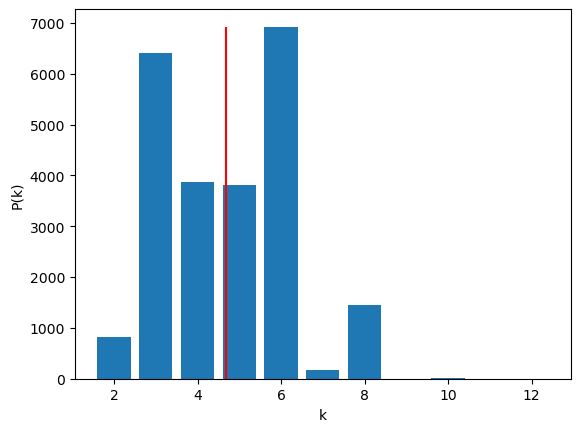

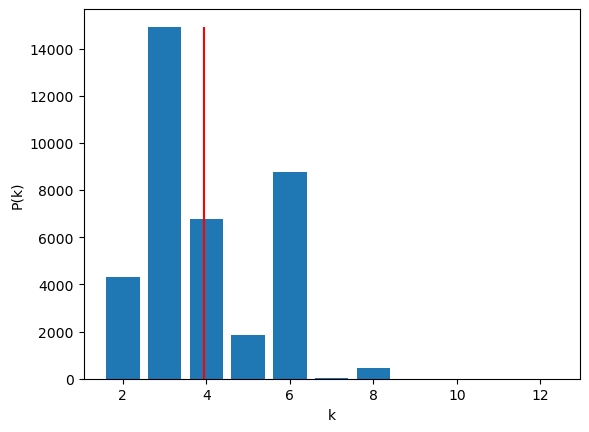

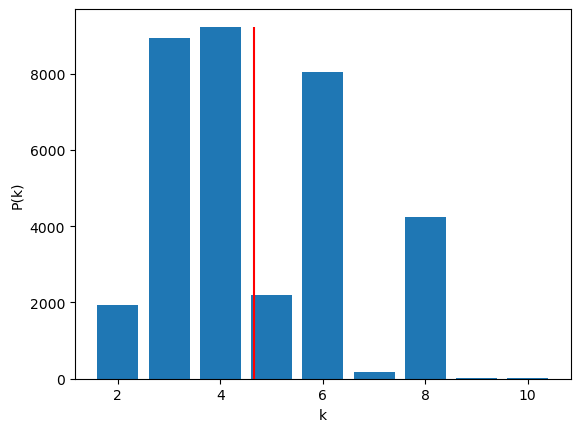

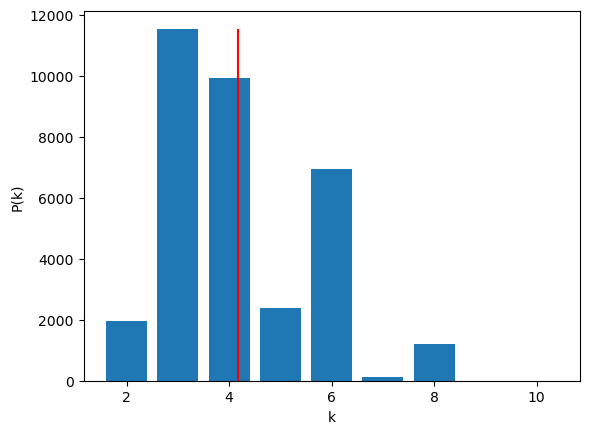

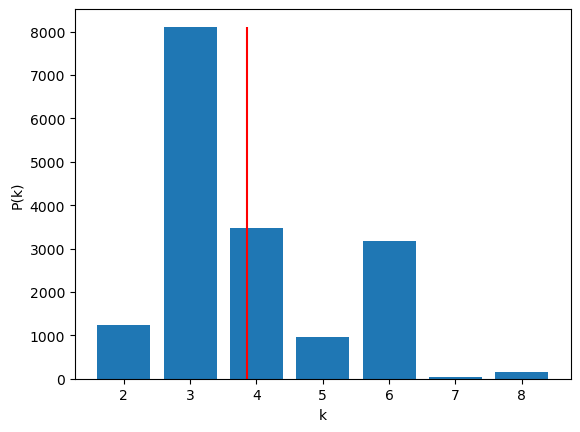

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
Names = ["BOS","LIS","LAX","SFO","RIO"]
for name in Names:
    G = ox.load_graphml(f"/home/alberto/LPSim/traffic_phase_transition/data/carto/{name}/{name}_new_tertiary_simplified.graphml")
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    av = np.mean(degree_sequence)
    fig,ax = plt.subplots()
    ax.bar(*np.unique(degree_sequence, return_counts=True))
    ax.vlines(av, 0, max(np.unique(degree_sequence, return_counts=True)[1]), color='red')
    ax.set_xlabel('k')
    ax.set_ylabel('P(k)')
    plt.show()
    plt.savefig(f"/home/alberto/LPSim/traffic_phase_transition/data/carto/{name}/{name}_degree_distribution.png")
    plt.close()

In [4]:
G.is_directed()

True

# Gravity Fit

In [47]:
def quadratic_loss_function(y_predict, y_measured):
    return np.sum((y_predict-y_measured)**2)

def multilinear4variables(x, log_k,beta,gamma,d0minus1):
    '''
        N is the couples of Origin and Destination
        Fitting like Vespignani:
            Vectors\Data:
                1) log Ni -> 1 Dimensional vector of length N being the mass of the grid i.
                2) log Nj -> 1 Dimensional vector of length N being the mass of the grid j.
                3) log dij -> 1 Dimensional vector of length N being the distance between centroids of grid i and j.
            Scalar\Parameters:
                1) log_d: -> k in Ramasco Paper
                2) a: exponent mass i
                3) b: exponent mass j
                4) c: exp(-1/d0)                        
    '''
    return log_k + beta * np.log(x[0]) + gamma * np.log(x[1]) + d0minus1 * x[2] 
def objective_function_multilinear4variables(params,x,y_measured):
    if len(params)!=4:
        raise ValueError('The parameters must be an array of length 4')
    if len(x)!=3:
        raise ValueError('The x must be an array of shape (3,N)')
    if len(x[0])!=len(y_measured):
        raise ValueError('The log of the fluxes must be of the same length as the masses')
    y_guessed = multilinear4variables(x, params[0],params[1],params[2],params[3])
    return quadratic_loss_function(y_guessed,y_measured)

def FittingGravity(x,y_measured,initial_guess = (0,1,1,-0.001),bounds = (np.array([-50,0,0,-2]),np.array([50,2,2,0])),maxfev = 50000):
    '''
        Input:
            label: 'powerlaw' or 'exponential' or 'linear'
            x: (np.array 1D) x-axis
            y_measured: (np.array 1D) y-axis
            initial_guess: (tuple 2D) parameters for fitting
        USAGE:

    '''
    from scipy.optimize import minimize
    from scipy.optimize import curve_fit
    print("Initial guess: ",initial_guess)
    result_powerlaw = minimize(objective_function_multilinear4variables, initial_guess, args = (x, y_measured))#,maxfev = maxfev
    optimal_params_pl = result_powerlaw.x
    optimal_params_pl = initial_guess
    fit = curve_fit(multilinear4variables, xdata = x, ydata = y_measured,p0 = list(optimal_params_pl),maxfev = maxfev) # , bounds = bounds
    print(fit)
    print('Gravity fit: ',fit[0][0],' ',fit[0][1],' ',fit[0][2],' ',fit[0][3])
    return fit,result_powerlaw.success

def EstimateLogk(Tij_dist_fit_gravity):
    def Divide(z,x,y):
        return z/(x*y)
    Tij_D0_k = Tij_dist_fit_gravity.filter(pl.col('distance') == 0)
    Tij_D0_k = Tij_dist_fit_gravity.with_columns(pl.struct(["number_people","population_origin","population_destination"]).map_batches(lambda x: Divide(x.struct.field('number_people'),x.struct.field("population_origin"),x.struct.field("population_origin"))).alias("k"))
    k_av = np.mean(Tij_D0_k['k'].to_numpy())
    print("Average log_k",np.log(k_av))
    plt.hist(Tij_D0_k.with_columns((np.log(pl.col("k"))).alias("k"))['k'].to_numpy())
    plt.show()
    return np.log(k_av)


def EstimateD0minus1(Tij_dist_fit_gravity):
    Tij_D0_diff = Tij_dist_fit_gravity.filter(pl.col('distance') != 0)
    d0minus1_av = 1/np.mean(Tij_D0_diff['distance'].to_numpy())
    plt.hist(Tij_D0_diff["distance"].to_numpy())
    plt.show()
    print("Average d0minus1: ",d0minus1_av)
    return d0minus1_av

def GravityModel(Mi,Mj,Dij,k,alpha,gamma,d0minus1):
    return k*Mi**alpha*Mj**gamma* np.exp(Dij*d0minus1)
def FluxesOverProductMasses(GravityFluxes,Mi,Mj,Alpha,Beta):
    return GravityFluxes/(Mi**Alpha*Mj**Beta)


<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/home/alberto/tmp_alberto/ipykernel_1827674/2993129688.py:5: SyntaxWarning: invalid escape sequence '\D'
  '''


In [42]:
import polars as pl
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os

Cities = ["BOS","LIS","LAX","SFO","RIO"]
City2Axisx = {"BOS":0,"LIS":1,"LAX":2,"SFO":3,"RIO":4}
City2Title = {"BOS":"Boston","LIS":"Lisbon","LAX":"Los Angeles","SFO":"San Francisco","RIO":"Rio de Janeiro"}
fig,ax = plt.subplots(2,len(Cities),figsize = (10,10))
potentialdir = f"/home/alberto/LPSim/traffic_phase_transition/data/carto"
for City in Cities:
    potentialdirCity = f"/home/alberto/LPSim/traffic_phase_transition/data/carto/{City}/potential/"
    dm = pl.read_csv(f"/home/alberto/LPSim/traffic_phase_transition/data/carto/{City}/grid/0.02/direction_distance_matrix.csv")
    g = gpd.read_file(f"/home/alberto/LPSim/traffic_phase_transition/data/carto/{City}/grid/0.02/grid.geojson")
    Tij = pl.read_csv(f"/home/alberto/LPSim/traffic_phase_transition/data/carto/{City}/grid/0.02/ODgrid.csv")
    g_renamed = g.rename(columns={"index":"index","population":"population_origin"})
    dm = dm.join(pl.DataFrame(g_renamed[["index","population_origin"]]), left_on="i", right_on = "index", how="inner")
    g_renamed = g.rename(columns={"index":"index","population":"population_destination"})
    dm = dm.join(pl.DataFrame(g_renamed[["index","population_destination"]]), left_on="j", right_on = "index", how="inner")
    Tij_dist = Tij.join(dm, left_on=["origin","destination"],right_on = ["i","j"], how="inner")
    Tij_dist = Tij_dist.drop(["(i,j)D","(i,j)O"])
    ### ALGorithm
    FilterPerGravityFit = (pl.col("number_people")>0,pl.col("population_origin")>0,pl.col("population_destination")>0)
    Tij_dist_fit_gravity = Tij_dist.filter(FilterPerGravityFit)
    print("Fraction Cells not Considered: ",len(Tij_dist_fit_gravity)/len(Tij_dist))
    import numpy as np
    mimjdij = np.array([Tij_dist_fit_gravity['population_origin'].to_numpy(),Tij_dist_fit_gravity['population_destination'].to_numpy(),Tij_dist_fit_gravity['distance'].to_numpy()])
    Fluxes = Tij_dist_fit_gravity['number_people'].to_numpy()
    Tij_dist_fit_gravity.filter(pl.col('distance') == 0)
    k,error = FittingGravity(mimjdij,np.log(np.array(Fluxes)),initial_guess = [EstimateLogk(Tij_dist_fit_gravity),0.01,0.01,-EstimateD0minus1(Tij_dist_fit_gravity)] ,bounds = (np.array([-50,0,0,-2]),np.array([50,2,2,0])) ,maxfev = 300000)
    logk = k[0][0]
    Alpha = k[0][1]
    Gamma = k[0][2]
    D0minus1 = k[0][3]
    K = np.exp(logk)
    n,bins = np.histogram(Tij_dist["distance"].to_numpy(),bins = 50)
    # PLOT '$W_{ij}/(m_i^{{\\alpha}} m_j^{{\\gamma}})$'
    Tij_dist_fit_gravity = Tij_dist_fit_gravity.with_columns(
        pl.struct(["distance","population_origin","population_destination"])
        .map_batches(lambda x: GravityModel(
            x.struct.field("population_origin"),
            x.struct.field("population_destination"),
            x.struct.field('distance'),
            K,Alpha,Gamma,D0minus1)).alias("gravity_fluxes"))
    K1 = K*np.sum(Tij_dist_fit_gravity["number_people"].to_numpy())/np.sum(Tij_dist_fit_gravity["gravity_fluxes"].to_numpy())
    Tij_dist_fit_gravity = Tij_dist_fit_gravity.with_columns(
        pl.struct(["distance","population_origin","population_destination"])
        .map_batches(lambda x: GravityModel(
            x.struct.field("population_origin"),
            x.struct.field("population_destination"),
            x.struct.field('distance'),
            K1,Alpha,Gamma,D0minus1)).alias("gravity_fluxes"))

    print("Maximum Fluxes: ",max(Tij_dist_fit_gravity["number_people"].to_numpy()))
    print("Maximum Gravity Fluxes: ",max(Tij_dist_fit_gravity["gravity_fluxes"].to_numpy()))
    print("Maximum Error In Fraction: ",max(np.sqrt((Tij_dist_fit_gravity["gravity_fluxes"].to_numpy() - Tij_dist_fit_gravity["number_people"].to_numpy())**2).mean()/Tij_dist_fit_gravity["number_people"].to_numpy()))
    print("Minimum Error in Fraction: ",min(np.sqrt((Tij_dist_fit_gravity["gravity_fluxes"].to_numpy() - Tij_dist_fit_gravity["number_people"].to_numpy())**2).mean()/Tij_dist_fit_gravity["number_people"].to_numpy()))
    print("Total Fluxes: ",sum(Tij_dist_fit_gravity["number_people"].to_numpy()))
    print("Total Gravity Fluxes: ",sum(Tij_dist_fit_gravity["gravity_fluxes"].to_numpy()))

    Distance = []
    WOverMM = []
    ErrorWOverMM = []
    WOverWD = []
    ErrorWOverWD = []
    for i in range(len(bins)-1):
        Tij_dist_bin_i = Tij_dist_fit_gravity.filter(pl.col('distance') > bins[i], 
                                pl.col('distance') < bins[i+1])
        SqrtN =len(Tij_dist_bin_i)
        Tij_dist_bin_i = Tij_dist_bin_i.with_columns(pl.struct(["gravity_fluxes","population_origin","population_destination"]).map_batches(lambda x: FluxesOverProductMasses(x.struct.field('gravity_fluxes'),x.struct.field("population_origin"),x.struct.field("population_destination"),k[0][1],k[0][2])).alias("W/(Mi^(a)Mj^(b))"))
        ErrorW0 = Tij_dist_bin_i.select((pl.col("W/(Mi^(a)Mj^(b))").std()).alias("error_W/(Mi^(a)Mj^(b))"))
        Tij_dist_bin_i = Tij_dist_bin_i.with_columns((pl.col("gravity_fluxes")/pl.col("number_people")).alias("We/Wd"))
        ErrorW1 = Tij_dist_bin_i.select((pl.col("We/Wd").std()).alias("error_We/Wd"))
        Distance.append(bins[i])
        WOverMM.append(np.mean(Tij_dist_bin_i['W/(Mi^(a)Mj^(b))'].to_numpy()))
        WOverWD.append(np.mean(Tij_dist_bin_i['We/Wd'].to_numpy()))
        if ErrorW0["error_W/(Mi^(a)Mj^(b))"][0] is None:
            ErrorWOverMM.append(0)
        else:
            ErrorWOverMM.append(ErrorW0["error_W/(Mi^(a)Mj^(b))"][0]*2)
        if ErrorW1["error_We/Wd"][0] is None:
            ErrorWOverWD.append(0)
        else:
            ErrorWOverWD.append(ErrorW1['error_We/Wd'][0]*2)

    MaxWOverWD = WOverWD[0]
    WOverWD = np.array(WOverWD)/MaxWOverWD
    ErrorWOverWD = np.array(ErrorWOverWD)/MaxWOverWD
    WOverMM = np.array(WOverMM)
    ErrorWOverMM = np.array(ErrorWOverMM)
    # PLOTTING
#    fig,ax = plt.subplots(1,1,figsize = (10,10))
    ax[City2Axisx[City]][0].errorbar(bins[:-1],WOverMM,yerr = ErrorWOverMM, fmt='o', capsize=5, color='red')
    ax.plot(bins[:-1],WOverMM[0]*np.exp(bins[:-1]*D0minus1), color='black',linestyle='--')
    ax.set_title(City)
    ax.text(10,0.1,r'$\frac{{1}}{{d_0}} = $' + str(round(D0minus1,3)),fontsize = 15)
    ax.set_yscale('log')
    ax.set_xlim(0,100)
    ax.set_ylim(min(WOverMM-ErrorWOverMM),max(WOverMM+ErrorWOverMM))
    ax.set_xlabel('R(km)')
    ax.set_ylabel(r'$W_{ij}/(m_i^{\alpha} m_j^{\gamma})$')
#    plt.savefig(os.path.join(potentialdir,'PlotFitVespignaniNew.png'),dpi = 200)

    fig,ax = plt.subplots(1,1,figsize = (10,10))
    ax.errorbar(bins[:-1],WOverWD[:],yerr = ErrorWOverWD[:], fmt='o', capsize=5, color='red')
    ax.hlines(1,0,max(bins),linestyle='--',color='black')
    ax.set_yscale('log')
    ax.set_xlabel('R(km)')
    ax.set_xlim(0,100)
    ax.set_ylim(min(WOverWD-ErrorWOverWD),max(WOverWD+ErrorWOverWD))
    ax.set_ylabel('$W_{ij} (M)/W_{ij} (D)$')
#    plt.savefig(os.path.join(potentialdir,'PlotFitVespignaniNewDataModel.png'),dpi = 200)


Maximum Fluxes:  1020
Maximum Gravity Fluxes:  16.166001372788337
Maximum Error In Fraction:  5.68071119053581
Minimum Error in Fraction:  0.005569324696603735
Total Fluxes:  735486
Total Gravity Fluxes:  735485.999999993


/home/alberto/anaconda3/envs/geostuff/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/alberto/anaconda3/envs/geostuff/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


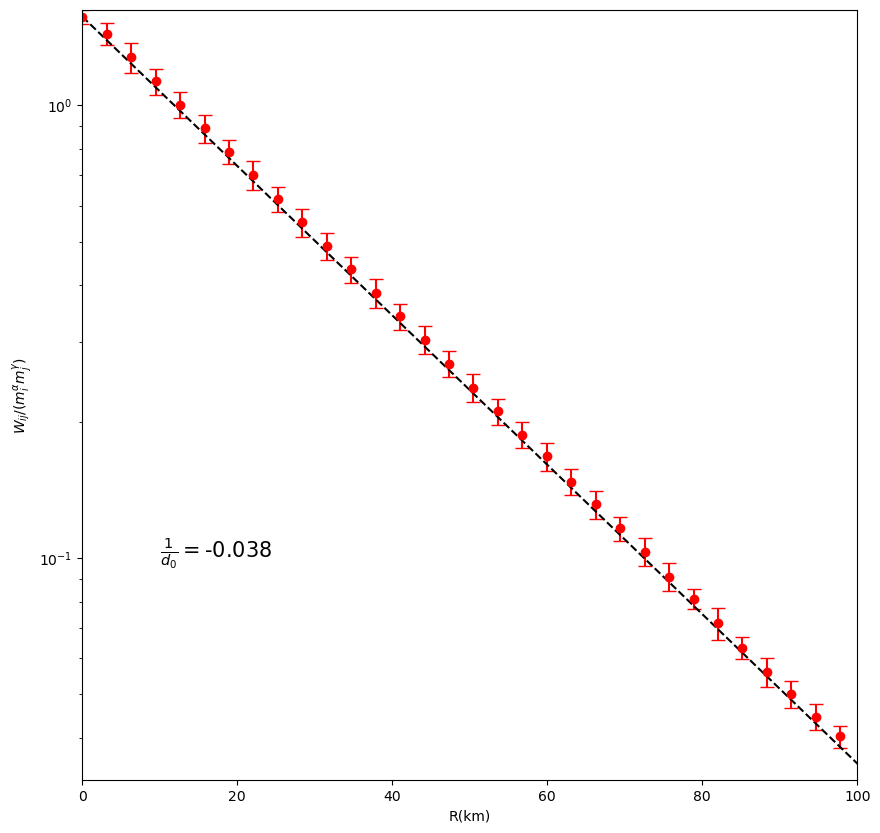

/home/alberto/tmp_alberto/ipykernel_1827674/1368411601.py:87: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(min(WOverWD-ErrorWOverWD),max(WOverWD+ErrorWOverWD))


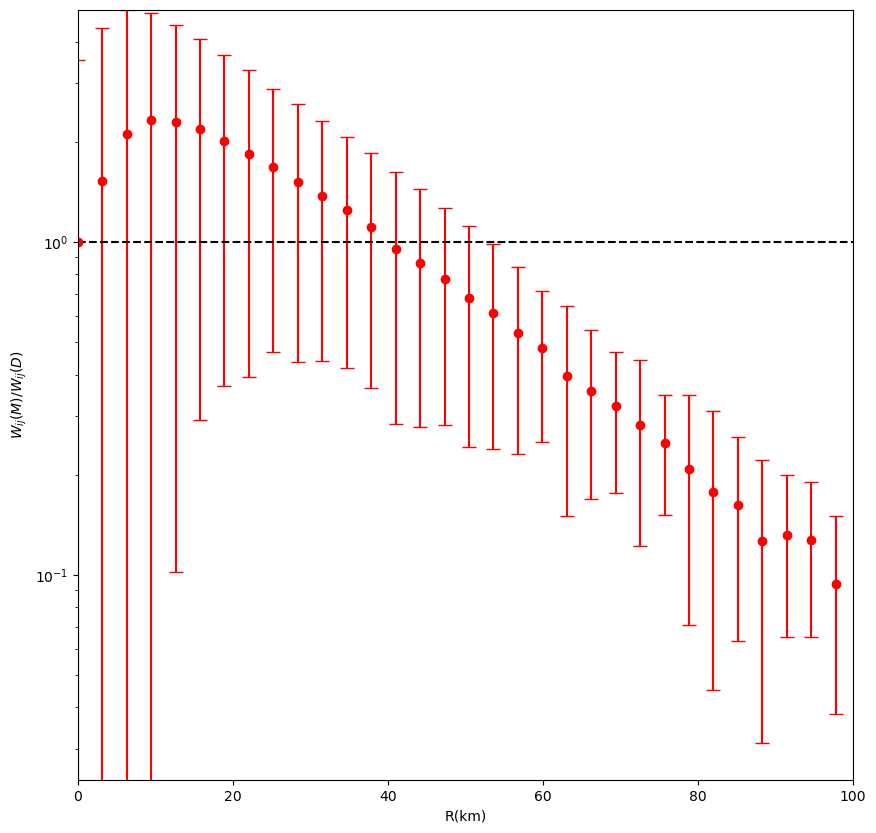

In [46]:
import json
with open(os.path.join(potentialdir,'FitVespignani.json'),'w') as f:
    json.dump({'logk':np.log(K1),'alpha': k[0][1],'gamma': k[0][2],'1/d0':k[0][3]},f)


In [78]:
Tij_dist_bin_i

origin,destination,number_people,,dir_vector,distance,population_origin,population_destination,gravity_fluxes,W/(Mi^(a)Mj^(b)),We/Wd
i64,i64,i64,i64,str,f64,f64,f64,f64,f64,f64
